In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np
from pathlib import Path
import matplotlib as mpl

# Set seaborn style
sns.set_style("whitegrid")

# Define your font
fpath = Path(mpl.get_data_path(), "fonts/ttf/cmr10.ttf")
fontprop = fm.FontProperties(fname=fpath, size=14)
fontprop_small = fm.FontProperties(fname=fpath, size=14)

COLORS=["#888888", "#B1053A", "#6699CC", "#44AA99", "#CC6677"]

### Original dataset

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


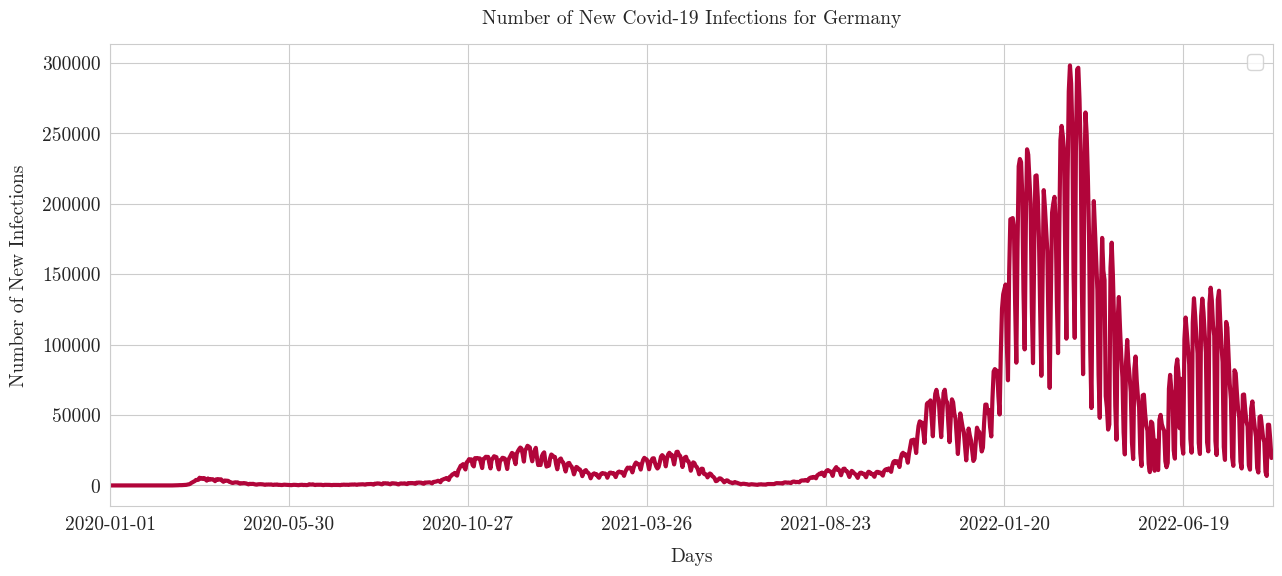

In [2]:
# Load your data
all_cases = pd.read_csv("real-world/raw/summed_cases_over_counties.csv")

# Create a plot
plt.figure(figsize=(15, 6))
plt.plot(all_cases["Day"], all_cases["Infected"], color=COLORS[1], markersize=4, linewidth=3)

# Set plot title and legend font
plt.title('Number of New Covid-19 Infections for Germany', fontsize=20, pad=15, fontproperties=fontprop)
plt.legend(prop=fontprop_small)

# Set x-label and y-label with custom font
plt.xlabel('Days', fontproperties=fontprop, labelpad=10)
plt.ylabel('Number of New Infections', fontproperties=fontprop, labelpad=10)

# Set xticks and yticks font
plt.xticks(np.arange(0, len(all_cases["Day"]), 150), fontproperties=fontprop_small)
plt.yticks(fontproperties=fontprop_small)

# Set x-axis limit
plt.xlim(0, len(all_cases) - 0)

# Show the plot
plt.show()

In [3]:
# get peak of fourth COVID wave before smoothing
raw_all_cases = all_cases[(all_cases['Day'] >= '2021-09-01') & (all_cases['Day'] <= '2022-01-01')].reset_index(drop=True)
max_infections = raw_all_cases['Infected'].max()
max_infections_day = raw_all_cases['Day'][raw_all_cases['Infected'].idxmax()]
max_infections_day


'2021-12-01'

In [4]:
# apply smoothing
all_cases["Infected"] = all_cases["Infected"].rolling(window=7, center=False).mean()

# apply second smoothing
all_cases["Infected"] = all_cases["Infected"].rolling(window=7, center=False).mean()

### Smoothed original dataset

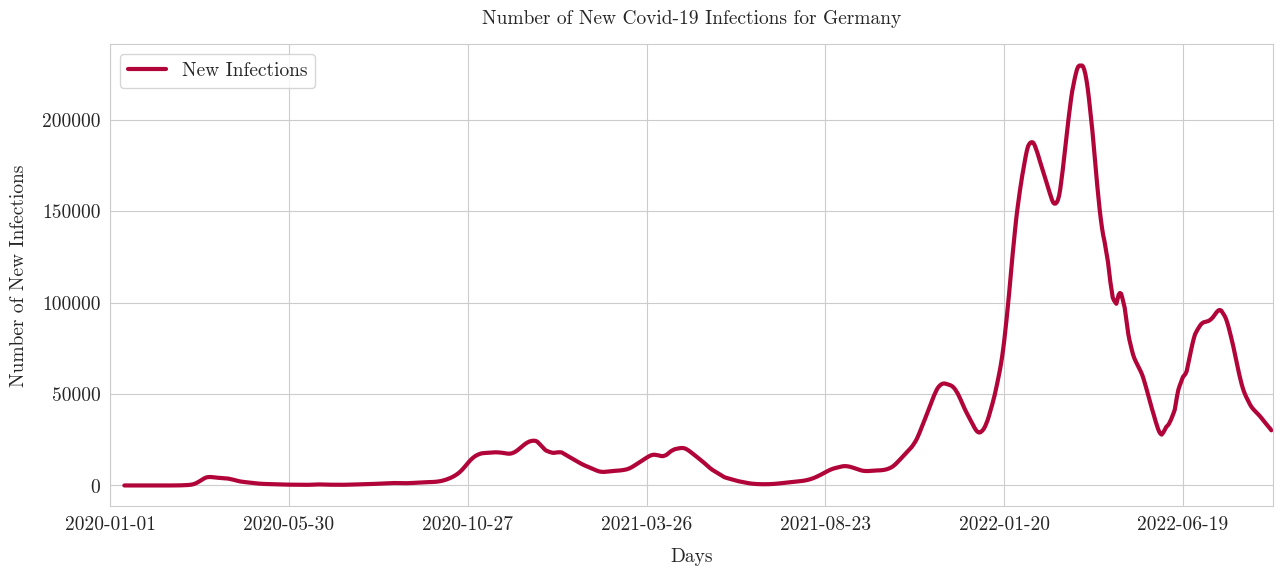

In [5]:
# Create a plot
plt.figure(figsize=(15, 6))
plt.plot(all_cases["Day"], all_cases["Infected"], color=COLORS[1], markersize=4, linewidth=3, label='New Infections')

# Set plot title and legend font
plt.title('Number of New Covid-19 Infections for Germany', fontsize=20, pad=15, fontproperties=fontprop)
plt.legend(prop=fontprop_small)

# Set x-label and y-label with custom font
plt.xlabel('Days', fontproperties=fontprop, labelpad=10)
plt.ylabel('Number of New Infections', fontproperties=fontprop, labelpad=10)

# Set xticks and yticks font
plt.xticks(np.arange(0, len(all_cases["Day"]), 150), fontproperties=fontprop_small)
plt.yticks(fontproperties=fontprop_small)

# Set x-axis limit
plt.xlim(0, len(all_cases) - 0)

# Show the plot
plt.show()

### Define final real-world dataset and train-test split

In [8]:
# get subset of dataset, from 2021-09-01 to 2021-11-01
all_cases = all_cases[(all_cases['Day'] >= '2021-09-01') & (all_cases['Day'] <= '2022-01-01')].reset_index(drop=True)
all_cases["Infected"] = all_cases["Infected"].round(0).astype(int)
all_cases["Infected"].to_csv("real-world/covid/covid.csv")

In [9]:
# get day where infection are at maximum
max_infections_day = all_cases["Day"].loc[all_cases["Infected"].idxmax()]
print('Day with maxmimum number of infections: ', max_infections_day)

# get index of day where infection are at maximum
max_infections_day_idx = all_cases["Infected"].idxmax()
print('Index of day with maxmimum number of infections: ', max_infections_day_idx)

Day with maxmimum number of infections:  2021-12-01
Index of day with maxmimum number of infections:  91


In [10]:
# calculate train test split
train_split_2 = round(max_infections_day_idx/len(all_cases), 3)
train_split_2


0.74

In [11]:
# test train split
all_cases['Day'].loc[round((train_split_2) * len(all_cases))]
(train_split_2) * len(all_cases)

91.02

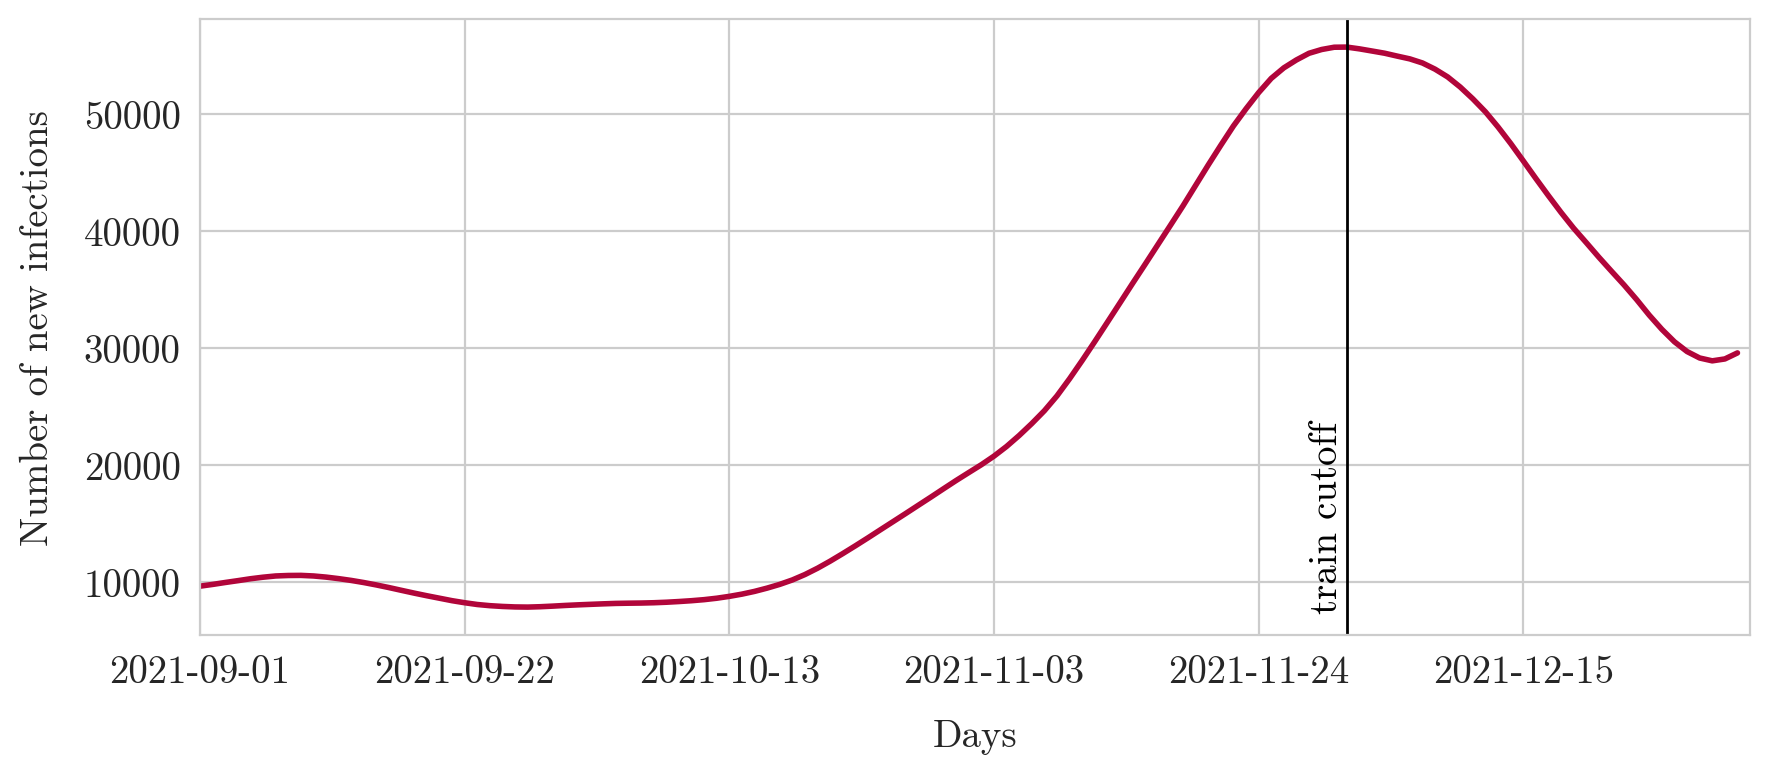

In [12]:
# Create a plot
plt.figure(figsize=(10, 4), dpi=200)
plt.plot(all_cases["Day"], all_cases["Infected"], color=COLORS[1], markersize=4, linewidth=2)

# Set x-label and y-label with custom font
plt.xlabel('Days', fontproperties=fontprop, labelpad=10)
plt.ylabel('Number of new infections', fontproperties=fontprop, labelpad=10)

# Set xticks and yticks font
plt.xticks(np.arange(0, len(all_cases["Day"]), 21), fontproperties=fontprop_small)
plt.yticks(fontproperties=fontprop_small)

# Set x-axis limit
plt.xlim(0, len(all_cases) - 0)

# plot train test splits
plt.axvline(int(train_split_2 * len(all_cases)), color = 'black', linestyle = '-', linewidth = '1.0')
plt.text(max_infections_day_idx-3, 8000, 'train cutoff', rotation=90, color = 'black', fontsize=14, font=fpath)

plt.show();

### Plot infection wave for visual abstract

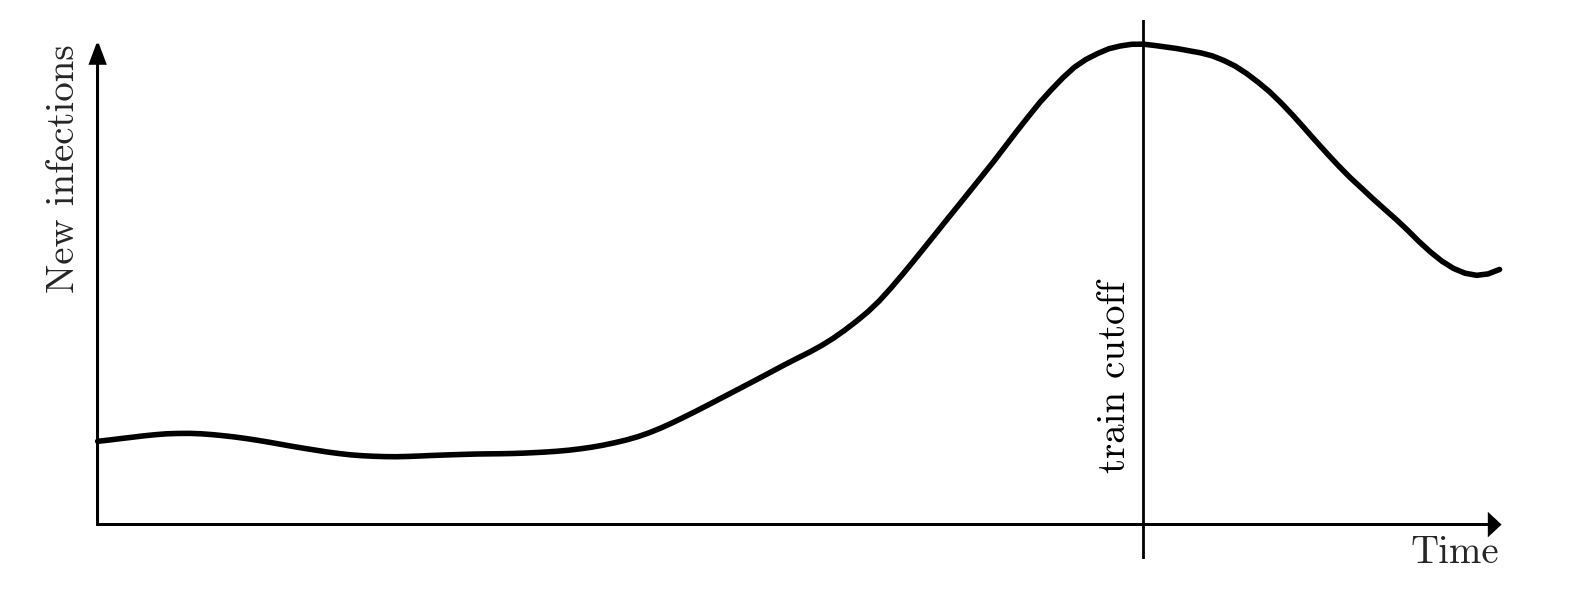

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming all_cases, COLORS, fontprop, fontprop_small, train_split_2, max_infections_day_idx are defined

plt.figure(figsize=(10, 3.5), dpi=200)
plt.plot(all_cases["Day"], all_cases["Infected"], color='black', markersize=4, linewidth=2)

# Remove the default axes
plt.axis('off')

# Draw arrows for x and y axes
plt.arrow(0, 0, len(all_cases) - 1, 0, length_includes_head=True, head_width=0.04*max(all_cases["Infected"]), head_length=0.9, fc='k', ec='k')
plt.arrow(0, 0, 0, max(all_cases["Infected"]), length_includes_head=True, head_width=1.25, head_length=0.04*max(all_cases["Infected"]), fc='k', ec='k')

# Add labels for the new axes
plt.text(len(all_cases) - 1, -0.08*max(all_cases["Infected"]), 'Time', fontsize=14, ha='right', font=fpath)
plt.text(-4.5, max(all_cases["Infected"]), 'New infections', fontsize=14, va='top', rotation=90, font=fpath)

# Plot train test splits
plt.axvline(int(train_split_2 * len(all_cases)), color='black', linestyle='-', linewidth='1.0')
plt.text(max_infections_day_idx-4, 7000, 'train cutoff', rotation=90, color='black', fontsize=14, font=fpath)

# Save and show the plot
plt.show()
